# Overview Of Problem.

* This project focuses on the application of various machine learning algorithms on NASA’s Kepler data for prediction of exoplanet. A comparative study of the performance of various algorithms will also be performed. The results obtained will be used to identify algorithms which are suitable for performing prediction about exoplanets. It is the need of the hour to utilize machine learning to expedite the process of exoplanet detection. This will provide greater insights in the study of planet habitability, stellar bodies and the variety of exoplanets that exist in our galaxy. As space telescopes return new data the model can be further tuned for a further improvement of accuracy. The proposed model will be able to operate on data generated by different ground and space observatories and classify exoplanets.

* I have Written A detailed blog about "Overvieew of problem" and "How Ai can help in solving this problem" And about how i solved this perticular problem. Please go through the link given bellow to read that blog--

https://utkarshjhansi11.medium.com/lets-find-planets-beyond-our-solar-system-milky-way-galaxy-with-the-help-of-905dcfc95d3d

# Choice of Performance Metric

* Choosing the right performance metric for any Ml,Dl,Ds problem is the first very important task to do. It is so important that if we didn't choose our main performance metric carefully then whole business objective of solving problem may get affected. Since we know our problem is 2-Class Classification So There are lots of metric which could be used to judge models, which we train Later. Choosing a right performance metric depends on what types of result you want mainly from your model. Undoubtedly we want our model to predict every class correctly but we need to choose out of all classes which class needs to predict more efficiently over other class. Also its not always true that we always need to choose one class over other class. It's completely problem to problem dependent. For example if we are building a face Recognition system then then there every class needs to predict correctly. there is no such thing like one persons class need to predict more efficiently over other person. But we have a different kind of problem here. And Business objective of building Ai model is different. That's why we are giving more preference here to a class over other class.

* Our objective here to predict "is there an exoplanet in orbit of that star .?" Hence if we create a model that can tell  "yes..!! there is a exoplanet orbiting star." as correctly as possible then our model is good. Of course that also need to tell "No.. There is not any exoplanet orbiting star." as correctly as possible. But even if there are some data points which predicted as "yes..!! there is a exoplanet orbiting star" and in reality there is not any planet then its like ok ok . Later we can discard that observation manually. But if there is any point which predicted by our models as "No.. there is not any exoplanet orbiting star." and in reality there is a exoplanet. Then the whole purpose of building Ai model goes in to Dustbin.

* So now if we talk in simple Modeling terminology then we need such model which could predict maximum positive points as correctly as possible. if there are very few negative points that predicted as positive then that's Okay. (Because we know not any Ai technique can give you 100% guaranty to make right prediction every time. Ai also has some drawbacks like every other thing in the universe. ) But there should not be any point or there should be minimum such points which actually belongs to positive class and predicted as negative.

##### Recall   :

* One such metric that fits in our objective is "Recall Score". Bellow is the formula of calculating recall -

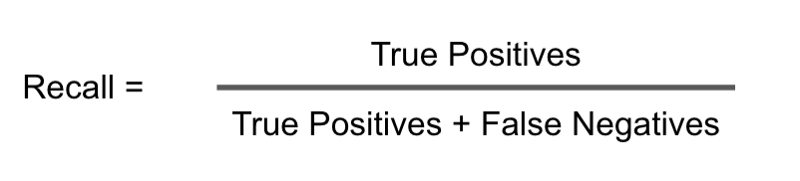

* So Recall is the metric which lies between 0 to 1. And that will be maximum(1) if there are all points which belongs to positive class and also predicted as positive points. & And that will be minimum(0) if there are all points which belongs to positive class but predicted as negative points. Hence Recall is a score that increases accordingly as no. of positive points predicts as positive points . & decreases accordingly if no. of positive points predicted as negative points. In short recall is the score that talks about "Out of all those points which actually belongs to positive class , how much of them your model is predicting as positive points."

##### Confusion matrix :

* Confusion matrix is the metric that I really like so much. And it's other metric that we will use to see how's our model is performing. If we see carefully then Confusion matrix is not any metric. Because it simply just counts no. of points classified correctly and incorrectly for each class and prints that. It's not like (Accuracy , F1-Score , Auc etc.. )which are one number metric and could mislead sometimes if we forgot internal details of how that metric is calculating or if we didn't give proper attention or person who is building model is not enough experienced. But Confusion matrix is just simply tells the actually ground truth very clearly so making sense of model performance becomes easy. That's the reason why I like it so much. Bellow is the way to create confusion matrix :

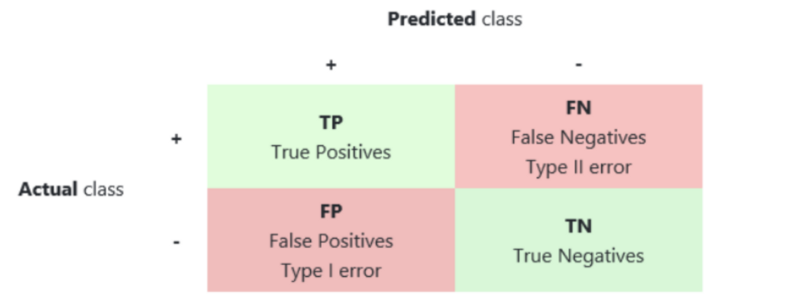

* That's all about making choice of performance metrics here. We will use Recall and Confusion matrix extensively to see how our trained models are performing. But we will also keep printing F1_score , Auc , Accuracy just for general purposes. but we will not rely on these metrics much. Because our data is highly imbalanced. and these one number metric can mislead us. Why is it so , that we will talk later when we see actual model performances. Since we have choose our performance metric so now lets go to the next step.

# Importing Some Required Libreries

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib

# Loading Data

In [48]:
start = time.time()
train_data = pd.read_csv(r"C:\Users\AC\Downloads\Exoplanet_hunting\Data\exoTrain.csv")
train_data["LABEL"] = train_data.LABEL.map({1:0,2:1})
end = time.time()
print("Train_data Loaded..!!\n","-"*50,"\nTime taken to load data is :",np.round(end - start,2),"Seconds\n",
       "-"*50,"\nShape of Train_data is:",train_data.shape,"\n","-"*50)
end = time.time()
train_data.head(3)

Train_data Loaded..!!
 -------------------------------------------------- 
Time taken to load data is : 8.74 Seconds
 -------------------------------------------------- 
Shape of Train_data is: (5087, 3198) 
 --------------------------------------------------


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


In [49]:
test_data = pd.read_csv(r"C:\Users\AC\Downloads\Exoplanet_hunting\Data\exoTest.csv")
test_data["LABEL"] = test_data.LABEL.map({1:0,2:1})
print("Test_data Loaded..!!\n","-"*50,"\nShape of Test_data is:",test_data.shape,"\n","-"*50)
test_data.head(3)

Test_data Loaded..!!
 -------------------------------------------------- 
Shape of Test_data is: (570, 3198) 
 --------------------------------------------------


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63


* In the shape of both datasets As we can see we have only 5087 data points in the train_dataset. And 570 datapoints in test dataset. By having only 5k datapoints in train_data we can say we actually have very little amount of data to deal with and Building good model could be challenging. Also the data is almost 3.2k dimensional which can be said as very high dimensional dataset. So we have a High dimensional small dataset. So finally i'll say Building a good model on top of this dataset might be challenging But on the other hand it'll be a great peace of learning ofcourse.

* It was just a little intro of the dataset. Main and deep analysis we will see in EDA part of this project.

# Exploratory Data Analysis 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### ** Let's get some basic information about the train_dataset we have 

In [5]:
# let's get some info about train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


###### Takeaways-- 

* We have 5087 entries(rows or data_points) in data. And index of those datapoints goes from 0 to 5086

* We have 3198 columns in which one column is of int type and rest all are of float type. We know label is our class_label that we will use to teach and train the model. So We actually have only numerical type 3097 columns in our dataset. 

* Currently train_data variable is in ram. So Memory(ram) using the train_dataset is 124mb.

###  ** It's really really important to see the distributions of class labels in both train and test dataset. And both shoud be almost same if we want our model to work on unseen future data.

In [6]:
# its really really important to see the distributions of class labels
num_of_class_0_points_train = train_data.LABEL.value_counts()[0]
num_of_class_1_points_train = train_data.LABEL.value_counts()[1]
print("In train data from all ",len(train_data),"points. We have -- \n",
          num_of_class_0_points_train,"Points as class label of 1. Which is ",
             np.round(num_of_class_0_points_train*100/len(train_data),2),"% of Whole data.\n",
          num_of_class_1_points_train,"Points as class label of 2. Which is ",
             np.round(num_of_class_1_points_train*100/len(train_data),2),"% of Whole data.")
print("-"*70)
num_of_class_0_points_test = test_data.LABEL.value_counts()[0]
num_of_class_1_points_test = test_data.LABEL.value_counts()[1]
print("In Test data from all ",len(test_data),"points. We have -- \n",
          num_of_class_0_points_test,"Points as class label of 1. Which is ",
             np.round(num_of_class_0_points_test*100/len(test_data),2),"% of Whole data.\n",
          num_of_class_1_points_test,"Points as class label of 2. Which is ",
             np.round(num_of_class_1_points_test*100/len(test_data),2),"% of Whole data.")

In train data from all  5087 points. We have -- 
 5050 Points as class label of 1. Which is  99.27 % of Whole data.
 37 Points as class label of 2. Which is  0.73 % of Whole data.
----------------------------------------------------------------------
In Test data from all  570 points. We have -- 
 565 Points as class label of 1. Which is  99.12 % of Whole data.
 5 Points as class label of 2. Which is  0.88 % of Whole data.


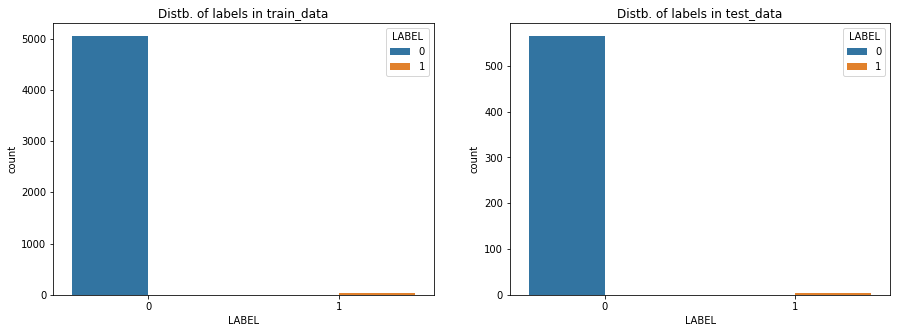

In [7]:
# plotting the dstributions of class_label
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax = sns.countplot(data = train_data , x = "LABEL" , hue ="LABEL")
ax = plt.title("Distb. of labels in train_data")
ax2 = f.add_subplot(122)
ax2 = sns.countplot(data = test_data , x = "LABEL" , hue ="LABEL")
ax2 = plt.title("Distb. of labels in test_data")

###### Takeaways--

* In Both train and test dataset we can see more than 99% of datapoints belongs to negative class(class_1). And less than 1% of data points belongs to possitive class(class_2). 

* It simply means we have more than 99% of datapoints. which doesn't ends up being decliared as a Exoplanet. Hence only less than 1% of observations are real Exoplanets.

* As we can see our data is extremely high imbalanced. It'll be another problem that we have to deal with.

### Now let's plot the actual data points from both positive and negative class. To understand the little_bit of behaviour of points from both class.

In [134]:
# first lets create 2 diffrent dataframes which has only possitive and negative points.
negative_points = train_data[train_data["LABEL"] == 0]
positive_points = train_data[train_data["LABEL"] == 1]

####   Plotting points from negative class 

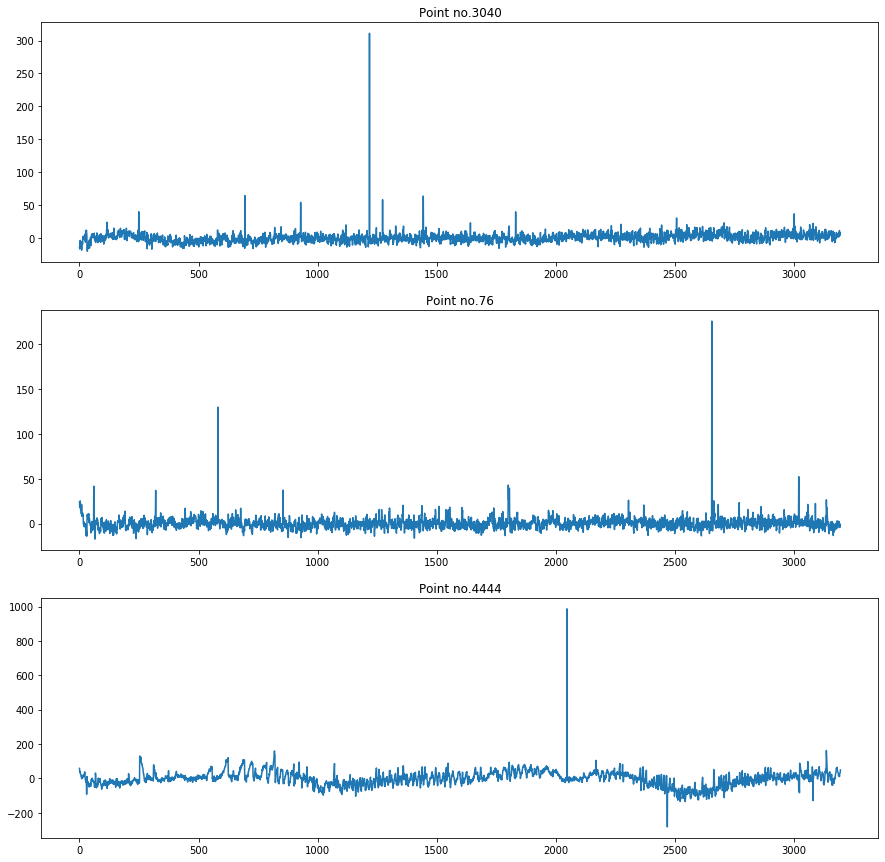

In [157]:
# Choosing index of 3 random negative points to plot
indexes_of_negative_points = np.random.choice(len(negative_points), 3) 

f = plt.figure(figsize=(15,15))

ax = f.add_subplot(311)
point = negative_points.iloc[indexes_of_negative_points[0]][1:]
ax = plt.plot(list(range(len(point))),point)
plt.title("Point no."+str(indexes_of_negative_points[0])+"in Negative_points.")
# 
ax2 = f.add_subplot(312)
point = negative_points.iloc[indexes_of_negative_points[1]][1:]
ax2 = plt.plot(list(range(len(point))),point)
plt.title("\n"+"Point no."+str(indexes_of_negative_points[1])+"in Negative_points.")
#
ax = f.add_subplot(313)
point = negative_points.iloc[indexes_of_negative_points[2]][1:]
ax3 = plt.plot(list(range(len(point))),point)
ax3 = plt.title("\n"+"Point no."+str(indexes_of_negative_points[2])+"in Negative_points.")

###### Takeaways--

* As we can see in the all 3 plots of 3 datapoints. The range of flux values is not ranging much. It means the the intensity of light we are getting from any star is not ranging much. Hence there should not be any exoplantes. Since these plots are of negative data points(those points which doesn't contain a exoplanet). Then it makes sense.

#### Plotting points from positive class 

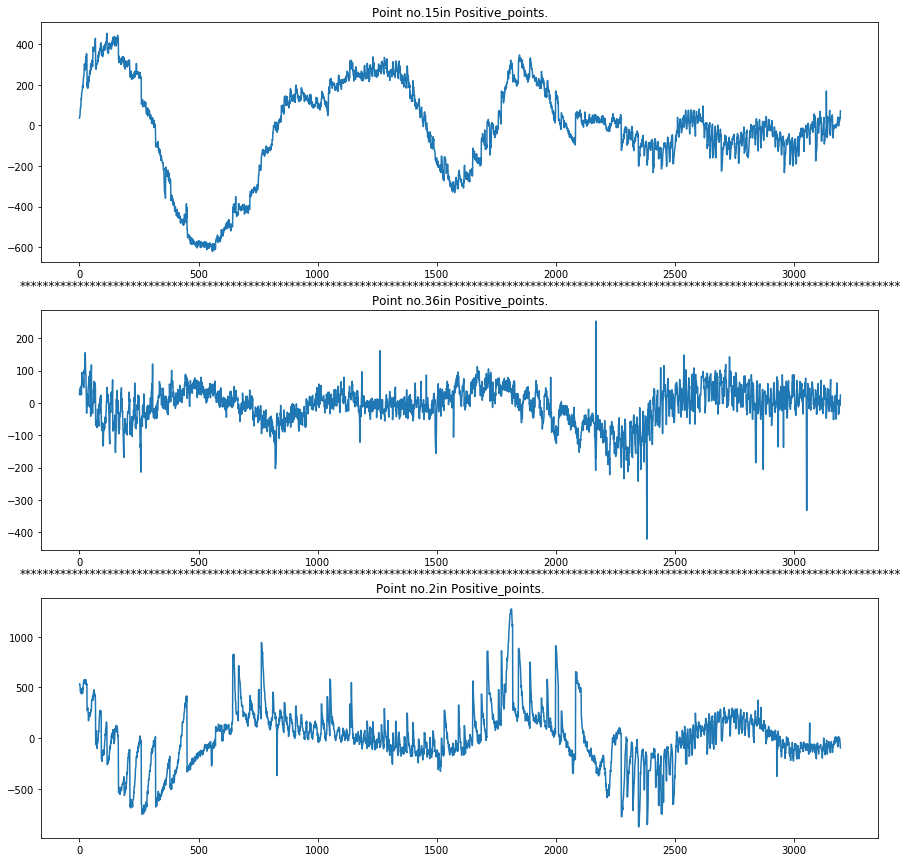

In [161]:
# Choosing index of 3 random positive points for plot
indexes_of_positive_points = np.random.choice(len(positive_points), 3) 

f = plt.figure(figsize=(15,15))
ax = f.add_subplot(311)
point = positive_points.iloc[indexes_of_positive_points[0]][1:]
ax = plt.plot(list(range(len(point))),point)
plt.title("Point no."+str(indexes_of_positive_points[0])+"in Positive_points.")
# 
ax2 = f.add_subplot(312)
point = positive_points.iloc[indexes_of_positive_points[1]][1:]
ax2 = plt.plot(list(range(len(point))),point)
plt.title("\n"+str("*"*150)+"\nPoint no."+str(indexes_of_positive_points[1])+"in Positive_points.")
#

ax = f.add_subplot(313)
point = positive_points.iloc[indexes_of_positive_points[2]][1:]
ax3 = plt.plot(list(range(len(point))),point)
ax3 = plt.title("\n"+str("*"*150)+"\nPoint no."+str(indexes_of_positive_points[2])+"in Positive_points.")

###### Takeaways--

* Just opposite from negative points here in all above 3 plots the flux values are ranging much with a pattern. It means that the light intensity values coming from star is varrying much. They simply goes down and then again comes up. Hence there should be an exoplanet which is orbitting the star. When that exoplanet orbits in front of star then the intensity value of light goes down. And when after some time that star reaches behind the star then intensity values of light again comes up.

### Now lets plot the PDF of data points of both classes.  

###### Plotting PDF's of points from negative class  

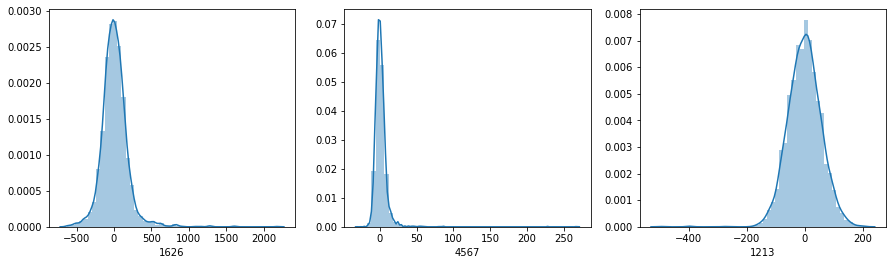

In [157]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(131)
point = negative_points.iloc[indexes_of_negative_points[0]][1:]
ax = sns.distplot(point)
# 
ax2 = f.add_subplot(132)
point = negative_points.iloc[indexes_of_negative_points[1]][1:]
ax2 = sns.distplot(point)
#
ax = f.add_subplot(133)
point = negative_points.iloc[indexes_of_negative_points[2]][1:]
ax3 = sns.distplot(point)

###### Takeaways--

* Here We can also see in negative class points the values of flux are coming from a small range as comparted to positive class. It means intensitty values of light coming from any star is almost same. Hence there shoud not be any exoplanet.

#### Plotting PDF's of points from positive class  

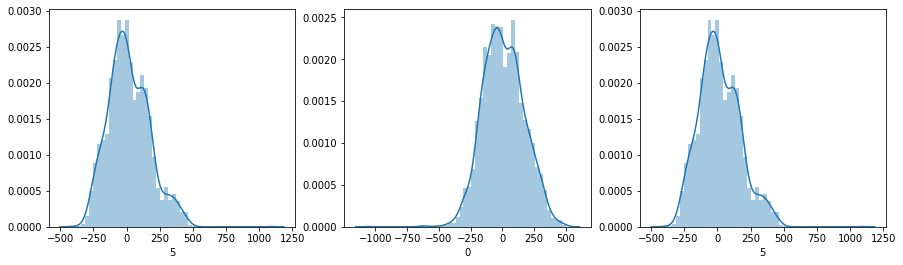

In [166]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(131)
point = positive_points.iloc[indexes_of_positive_points[0]][1:]
ax = sns.distplot(point)
# 
ax2 = f.add_subplot(132)
point = positive_points.iloc[indexes_of_positive_points[1]][1:]
ax2 = sns.distplot(point)
#
ax = f.add_subplot(133)
point = positive_points.iloc[indexes_of_positive_points[2]][1:]
ax3 = sns.distplot(point)

###### Takeaways--

* Here in positive datapoints we can see the flux values are coming from a wide range as compared to negative points. it means light intansity values comingb from any star is diming and again coming up. Hence there is a exoplanet orbiting the star. thats why because of exoplanet the light intensity again comes up and goes down.

# Preprocessing of data

### First let seprate the labels column in a diffrent variable. For both train and test data.

In [50]:
labeles_of_train_data = train_data.LABEL
labeles_of_test_data = test_data.LABEL
train_data = train_data.drop("LABEL" , axis = 1)
test_data = test_data.drop("LABEL" , axis = 1)
print("Shape of Train_data & labeles_of_train_data is :",train_data.shape,"&",labeles_of_train_data.shape)
print("Shape of Test_data & labeles_of_test_data is :",test_data.shape,"&",labeles_of_test_data.shape)

Shape of Train_data & labeles_of_train_data is : (5087, 3197) & (5087,)
Shape of Test_data & labeles_of_test_data is : (570, 3197) & (570,)


### Detecting Outliers 

In [51]:
sample_column = np.array(train_data["FLUX.2876"])
sample_column.shape

(5087,)

In [52]:
sample_column

array([-91.41,  -1.42, 173.81, ..., -46.5 ,   0.65,  21.12])

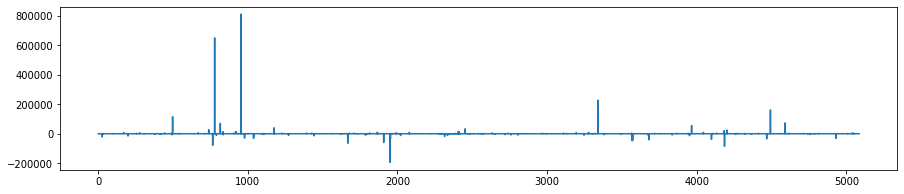

In [53]:
plt.figure(figsize=(15,3))
ax = plt.plot(list(range(len(sample_column))),sample_column)

In [54]:
print("0th Percentile is :",np.percentile(sample_column,0))
print("1st Percentile is :",np.percentile(sample_column,1))
print("-"*70)
print("99th Percentile is :",np.percentile(sample_column,99))
print("100th Percentile is :",np.percentile(sample_column,100))
print("-"*70)
print("median is :",np.median(sample_column))

0th Percentile is : -194562.0
1st Percentile is : -3599.969800000001
----------------------------------------------------------------------
99th Percentile is : 3011.273200000004
100th Percentile is : 812101.12
----------------------------------------------------------------------
median is : 2.42000000001281


###### Takeaways : 

* As we can clearly see 99th percentile value of feature "Flux.2876" is 3011 and 100th percentile value is 812101. It means there are 99 % values which lies bellow or equal to 3011 and only 1%  values which lies between 3011 to 812101. Hence it makes sense to declare these 1% values are outliers because they are extremely high and not lies in the range of rest 99% Values.

* Same with 0th and 1th percentile values. Here 0th percentile value is -194562 and 1st percentile value is -3599. Hence it makes sense to declare these 1% values are outliers because they are extremely low and not lies in the range of rest 99% Values.

* So ill check values of every feature and if any value of that feature is lower then 1st percentile value or greater then 99th percentile then I replace that value with median of that feature.

### Removing Outliers of Train_data

In [55]:
print("Removing outlier from Train_dataset And creating new Dataframe..!!\n","-"*50)
start = time.time()

outlier_removed_train_data = pd.DataFrame()
outlier_history_dict = dict()
for column_name in train_data.columns:
    column = np.array(train_data[column_name])
    percentile_1th = np.percentile(column,1)
    percentile_99th = np.percentile(column,99)
    median = np.median(column)
    new_column = []
    for value in column:
        new_value = value
        if value < percentile_1th:
            new_value = median
        if value > percentile_99th:
            new_value = median
        new_column.append(new_value)
    column_dict = dict()
    column_dict["percentile_1th"] = percentile_1th
    column_dict["percentile_99th"] = percentile_99th
    column_dict["median"] = median
    outlier_history_dict[column_name] = column_dict
    outlier_removed_train_data[column_name] = new_column
    
end = time.time()
print("outlier_removed_train_data Prepared In ",np.round(end - start,2),"Seconds\n","-"*50)
print("Saving outlier_history_dict in disk for future use..!!")
np.save('outlier_history_dict.npy', outlier_history_dict)
print("Saved Outlier-dict in disk for future use..!!")

Removing outlier from Train_dataset And creating new Dataframe..!!
 --------------------------------------------------
outlier_removed_train_data Prepared In  27.75 Seconds
 --------------------------------------------------
Saving outlier_history_dict in disk for future use..!!
Saved Outlier-dict in disk for future use..!!


In [56]:
print("Shape of outlier_removed_train_data is :",outlier_removed_train_data.shape)
outlier_removed_train_data.head(3)

Shape of outlier_removed_train_data is : (5087, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


* If you notice then I make a dictionary here "outlier_history_dict" Which contains information about 1st and 99th percentile and median of that feature. Its because we also need to remove outlier from test data. And if we didn't save information about when a value needs to declare an outlier then while removing outliers from test data how we declare which value is a outlier and which is not. Apart from test data when we deployed any model then we need to perform all preprocessing step in a single function. That time we will need information about each preprocessing step we have done on the data before modeling. That's why its really really important to save all these information and reuse it as in when needed.

#### Checking if the Outliers is really Removed from Train_data or not 

* For checking lets again plot and print percentiles of that feature that we will used earlier and will compare with previous result. if Previous 0th and 100th percentile values are removed then our code is right and we removed outlier successfully.

In [100]:
outlier_removed_column = np.array(outlier_removed_train_data["FLUX.2876"])
outlier_removed_column.shape

(5087,)

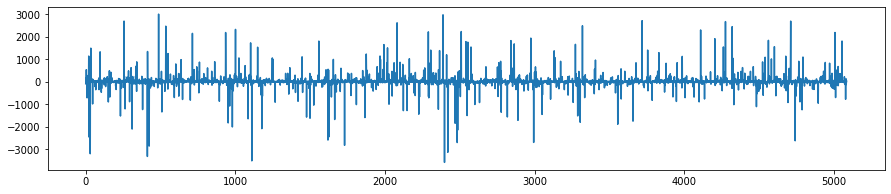

In [104]:
plt.figure(figsize=(15,3))
ax = plt.plot(list(range(len(outlier_removed_column))),outlier_removed_column)

* As we can clearly see now there is not any very high alone line. It means there is not any point which doesn't lies in the range of rest all values. For being much sure lets again print percentiles .

In [4]:
print("0th Percentile is :",np.percentile(outlier_removed_column,0))
print("1st Percentile is :",np.percentile(outlier_removed_column,1))
print("-"*70)
print("99th Percentile is :",np.percentile(outlier_removed_column,99))
print("100th Percentile is :",np.percentile(outlier_removed_column,100))
print("-"*70)
print("median is :",np.median(outlier_removed_column))

0th Percentile is : -3590.44
1st Percentile is : -1004.6560000000001
----------------------------------------------------------------------
99th Percentile is : 1096.629199999977
100th Percentile is : 3002.75
----------------------------------------------------------------------
median is : 2.42000000001281


* As we can clearly see Since we removed extremely low and high values hence 0th and 100th percentile values of feature changed. Here is also some difference in 0th and 1st percentile value & 99th and 100th percentile value. But it will remains. its not that much large like previously where 99th percentile value was 3k and 100th percentile value was 81k.

### Removing outlier of Test_data With Outlier history we gained from Train_data 

In [57]:
outlier_history_dict = np.load('outlier_history_dict.npy',allow_pickle='TRUE').item()

In [58]:
print("Removing outlier from Test_dataset using train_dataset history And creating new Dataframe..!!!\n","-"*50)
outlier_removed_test_data = pd.DataFrame()
for column_name in test_data.columns:
    column = np.array(test_data[column_name])
    percentile_1th = outlier_history_dict[column_name]["percentile_1th"]
    percentile_99th = outlier_history_dict[column_name]["percentile_99th"]
    median = outlier_history_dict[column_name]["median"]
    new_column = []
    for value in column:
        new_value = value
        if value < percentile_1th:
            new_value = median
        if value > percentile_99th:
            new_value = median
        new_column.append(new_value)
    outlier_removed_test_data[column_name] = new_column
    
print("\nNew Test dataset prepared which is Outlier prone..!!")

Removing outlier from Test_dataset using train_dataset history And creating new Dataframe..!!!
 --------------------------------------------------

New Test dataset prepared which is Outlier prone..!!


In [59]:
print("Shape of outlier_removed_test_data is :",outlier_removed_test_data.shape)
outlier_removed_test_data.head(3)

Shape of outlier_removed_test_data is : (570, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,-0.71,-0.89,-0.74,-0.40,-0.61,-1.03,-0.87,-0.66,-0.56,-0.96,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63


### Min_max Scalling of data 

* As we all know In raw numerical type data feature values could lie in a vast range or in any distribution. But for building a good model it is always recommended that feature values should lie in a particular range or from a normal distribution. There are lots of methods through which we can do that & Min-Max scaling is just one type of transformation that we could do on numerical data. Min-Max scaling transformed a feature in such a way that every value of feature will lie in 0-1 range.

##### Scalling Train_Data 

In [2]:
print("""Scaling each feature in 0-1 range and creating new_dataframe "scalled_train_data".""")
scalled_train_data = pd.DataFrame()
scalling_history_dict = dict()
for feature_name in outlier_removed_train_data.columns:
    feature = outlier_removed_train_data[feature_name]
    normalized_feature = []
    min_feature = min(feature)
    max_feature = max(feature)
    for feature_value in feature:
        normalized_value = ((feature_value - min_feature) / (max_feature - min_feature))
        normalized_feature.append(normalized_value)
    scalled_train_data[feature_name] = normalized_feature
    dict_of_this_feature = dict()
    dict_of_this_feature["min_feature"] = min_feature
    dict_of_this_feature["max_feature"] = max_feature
    scalling_history_dict[feature_name] = dict_of_this_feature

print("-"*50)
print("scalled_train_data Prepared In ",np.round(end - start,2),"Seconds\n","-"*50)    
print("Length of scalling_history_dict is :",len(scalling_history_dict))
print("Saving scalling_history_dict-dict in disk for future use..!!")
np.save('scalling_history_dict.npy', scalling_history_dict)
print("Saved scalling_history_dict-dict in disk for future use..!!")

Scaling each feature in 0-1 range and creating new_dataframe "scalled_train_data".
--------------------------------------------------
scalled_train_data Prepared In  27.75 Seconds
--------------------------------------------------
Length of scalling_history_dict is : 3197
Saving scalling_history_dict-dict in disk for future use..!!
Saved scalling_history_dict-dict in disk for future use..!!


In [65]:
print("Shape of scalled_train_data is :",scalled_train_data.shape)
preprocessed_train_data.head(3)

Shape of scalled_train_data is : (5087, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.544171,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.555341,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.545124,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249


* If you notice here I also created a dictionary named "scalling_history_dict". Which contains information about min and max value of each feature. The reason is same like we save outlier_history_dict. Because we also need to scale test data where we will need the min and max value of each feature from train data. Apart from test data after deployment of model when we predict a given raw data point there we will need these information we gained from train data. that's why we saved it in disk.

#### Scalling Test_Data With the scalling history we gained from Train_Data  

In [66]:
scalling_history_dict = np.load('scalling_history_dict.npy',allow_pickle='TRUE').item()
print("Loaded..!!")

Loaded..!!


In [67]:
print("""Scaling each feature of test dataset in 0-1 range and creating new_dataframe "preprocessed_train_data".""")
scalled_test_data = pd.DataFrame()
for feature_name in test_data.columns:
    feature = outlier_removed_test_data[feature_name]
    normalized_feature = []
    min_feature = scalling_history_dict[feature_name]["min_feature"]
    max_feature = scalling_history_dict[feature_name]["max_feature"]
    for feature_value in feature:
        normalized_value = ((feature_value - min_feature) / (max_feature - min_feature))
        normalized_feature.append(normalized_value)
    scalled_test_data[feature_name] = normalized_feature

print("-"*50)
print("Shape of scalled_test_data is :",scalled_test_data.shape)
preprocessed_test_data.head(3)

Scaling each feature of test dataset in 0-1 range and creating new_dataframe "preprocessed_train_data".
--------------------------------------------------
Shape of scalled_test_data is : (570, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.558536,0.605372,0.534329,0.523186,0.500681,0.463255,0.494217,0.480500,0.539895,0.530567,...,0.557999,0.599802,0.503116,0.554376,0.591685,0.608925,0.589326,0.605991,0.608440,0.582645
1,0.540974,0.589298,0.521615,0.515838,0.493668,0.457377,0.491116,0.479358,0.538770,0.534007,...,0.468924,0.445735,0.319416,0.342450,0.336723,0.335850,0.193993,0.197838,0.182267,0.252009
2,0.664061,0.719409,0.633995,0.616964,0.584640,0.530168,0.561577,0.533685,0.571294,0.558795,...,0.558492,0.588908,0.493863,0.546639,0.578446,0.580402,0.567449,0.572268,0.557548,0.578364


##### Concatinating train_labels with Scalled_Train_data And test_labels with Scalled_Test_data Then Saving Both Datasets in Disk 

In [3]:
scalled_train_data["LABEL"] = list(labeles_of_train_data)
scalled_test_data["LABEL"] = list(labeles_of_test_data)
print("Saving scalled_train_data in Disk..!!")
scalled_train_data.to_csv("scalled_train_data.csv", encoding='utf-8', index=False)
print("scalled_train_data Saved in Disk..!!")
print("-"*50)
print("Saving scalled_test_data in Disk..!!")
scalled_test_data.to_csv("scalled_test_data.csv", encoding='utf-8', index=False)
print("scalled_test_data Saved in Disk..!!")

Saving scalled_train_data in Disk..!!
scalled_train_data Saved in Disk For Future..!!
--------------------------------------------------
Saving scalled_test_data in Disk..!!
scalled_test_data Saved in Disk For Future..!!


# Reducing Dimensionality Of Dataset with T-sne to visualize Whole data

In [4]:
scalled_train_data = pd.read_csv(r"scalled_train_data.csv")
print("Train_data Loaded..!!\n","-"*50,"\nShape of Test_data is:",scalled_train_data.shape,"\n","-"*50)
scalled_train_data.head(3)

Train_data Loaded..!!
 -------------------------------------------------- 
Shape of Test_data is: (5087, 3198) 
 --------------------------------------------------


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276,1
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673,1
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249,1


In [7]:
labeles_of_train_data = scalled_train_data["LABEL"]
labeles_of_test_data = scalled_test_data["LABEL"]
scalled_train_data = scalled_train_data.drop("LABEL",axis = 1)
scalled_test_data = scalled_test_data.drop("LABEL",axis = 1)
labeles_of_train_data.shape,labeles_of_test_data.shape

((5087,), (570,))

In [8]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2 , random_state = 0,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(scalled_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
dataset_with_2_dimensions.head()

Shape of train_dataset after reducing dimensionality is : (5087, 2)


,1st-dim,2nd-dim
0,-24.426668,-10.908233
1,-15.345772,-45.788734
2,-24.334641,5.812852
3,-28.802084,-14.434209
4,-20.607664,-4.630526


In [9]:
labels = list(labeles_of_train_data)
dataset_with_2_dimensions['labels'] = labels
dataset_with_2_dimensions.head()

,1st-dim,2nd-dim,labels
0,-24.426668,-10.908233,1
1,-15.345772,-45.788734,1
2,-24.334641,5.812852,1
3,-28.802084,-14.434209,1
4,-20.607664,-4.630526,1


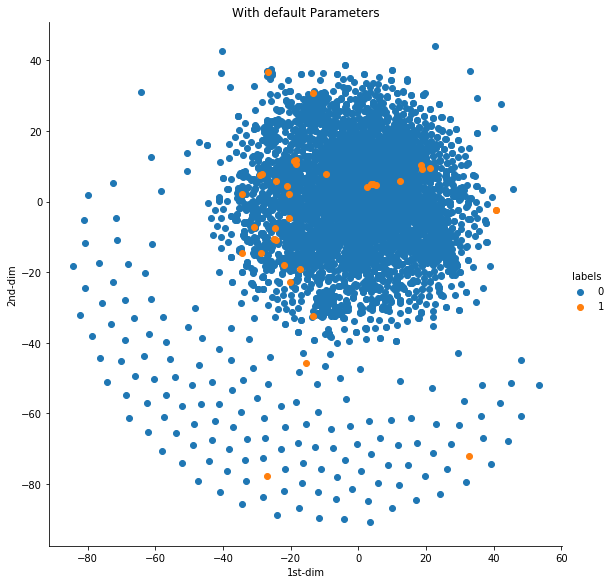

In [10]:
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With default Parameters")
plt.show()

#### With Perplexity = 50

Shape of train_dataset after reducing dimensionality is : (5087, 2)


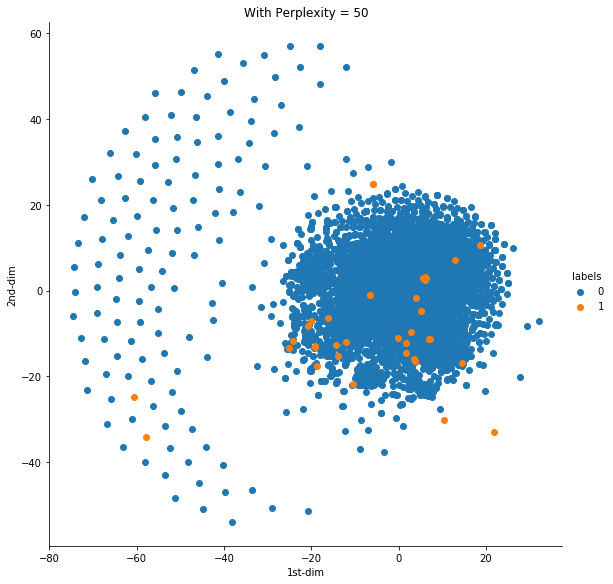

In [11]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 50,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(scalled_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(labeles_of_train_data)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Perplexity = 50")
plt.show()

#### With Perplexity = 100 

Shape of train_dataset after reducing dimensionality is : (5087, 2)


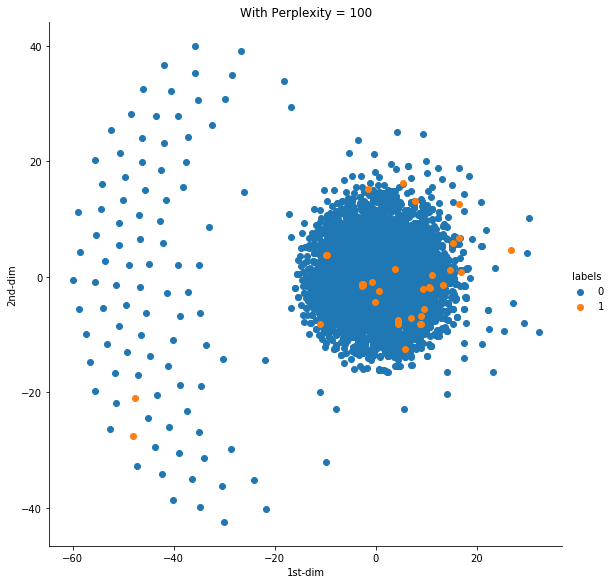

In [12]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 100,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(scalled_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(labeles_of_train_data)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Perplexity = 100")
plt.show()

#### With Perplexity = 100 & Num._of iterations = 3000 

Shape of train_dataset after reducing dimensionality is : (5087, 2)


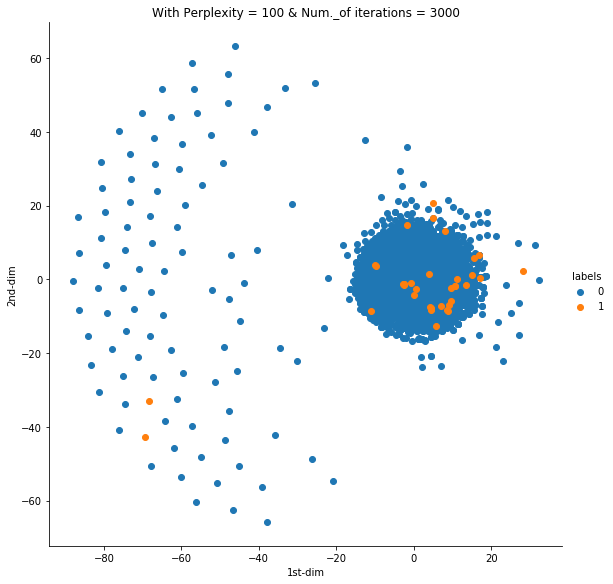

In [13]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 100 , n_iter= 3000,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(scalled_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(labeles_of_train_data)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Perplexity = 100 & Num._of iterations = 3000")
plt.show()

###### Takeaways :

* In Above all the plots The positive points are clearly overlapping with negative classes  points. This implies Its going hard to make a model which can separate points of both classes. Again , It could be possible because we are going from 3k dimensions to just 2 dimensions. But lets not worry much and go for modeling Because models are the last truth. We can not make any slid conclusion just by seeing T-sne plots.

# Machine Learning Modeling On imbalanced data

### Loading And preparing data for Modeling.

In [2]:
start = time.time()
scalled_train_data = pd.read_csv("scalled_train_data.csv")
end = time.time()
print("scalled_train_data Loaded..!!\n","-"*50,"\nTime taken to load data is :",np.round(end - start,2),"Seconds\n",
       "-"*50,"\nShape of Train_data is:",scalled_train_data.shape,"\n","-"*50)
end = time.time()
scalled_train_data.head(3)

scalled_train_data Loaded..!!
 -------------------------------------------------- 
Time taken to load data is : 13.59 Seconds
 -------------------------------------------------- 
Shape of Train_data is: (5087, 3198) 
 --------------------------------------------------


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276,1
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673,1
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249,1


In [3]:
scalled_test_data = pd.read_csv(r"scalled_test_data.csv")
print("scalled_test_data Loaded..!!\n","-"*50,"\nShape of Test_data is:",scalled_test_data.shape,"\n","-"*50)
scalled_test_data.head(3)

scalled_test_data Loaded..!!
 -------------------------------------------------- 
Shape of Test_data is: (570, 3198) 
 --------------------------------------------------


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
0,0.558536,0.605372,0.534329,0.523186,0.500681,0.463255,0.494217,0.480500,0.539895,0.530567,...,0.599802,0.503116,0.554376,0.591685,0.608925,0.589326,0.605991,0.608440,0.582645,1
1,0.540974,0.589298,0.521615,0.515838,0.493668,0.457377,0.491116,0.479358,0.538770,0.534007,...,0.445735,0.319416,0.342450,0.336723,0.335850,0.193993,0.197838,0.182267,0.252009,1
2,0.664061,0.719409,0.633995,0.616964,0.584640,0.530168,0.561577,0.533685,0.571294,0.558795,...,0.588908,0.493863,0.546639,0.578446,0.580402,0.567449,0.572268,0.557548,0.578364,1


#### Spiliting Labels of Both datasets 

In [4]:
train_labels = scalled_train_data["LABEL"]
scalled_train_data = scalled_train_data.drop("LABEL" , axis = 1)
test_labels =  scalled_test_data["LABEL"]
scalled_test_data =  scalled_test_data.drop("LABEL" , axis = 1)

In [5]:
scalled_train_data.head(3)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.544171,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.555341,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.545124,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249


In [6]:
scalled_test_data.head(3)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.558536,0.605372,0.534329,0.523186,0.500681,0.463255,0.494217,0.480500,0.539895,0.530567,...,0.557999,0.599802,0.503116,0.554376,0.591685,0.608925,0.589326,0.605991,0.608440,0.582645
1,0.540974,0.589298,0.521615,0.515838,0.493668,0.457377,0.491116,0.479358,0.538770,0.534007,...,0.468924,0.445735,0.319416,0.342450,0.336723,0.335850,0.193993,0.197838,0.182267,0.252009
2,0.664061,0.719409,0.633995,0.616964,0.584640,0.530168,0.561577,0.533685,0.571294,0.558795,...,0.558492,0.588908,0.493863,0.546639,0.578446,0.580402,0.567449,0.572268,0.557548,0.578364


### Modeling With KNN. 

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

hyperparameter_dict = dict(n_neighbors = list(range(1,25,3)), weights = ["uniform", "distance"])

knn = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)
knn.fit(scalled_train_data,train_labels)
knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [8]:
knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [10]:
best_knn = KNeighborsClassifier(n_neighbors =  1, weights = 'uniform')
best_knn.fit(scalled_train_data,train_labels)

KNeighborsClassifier(n_neighbors=1)

In [11]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


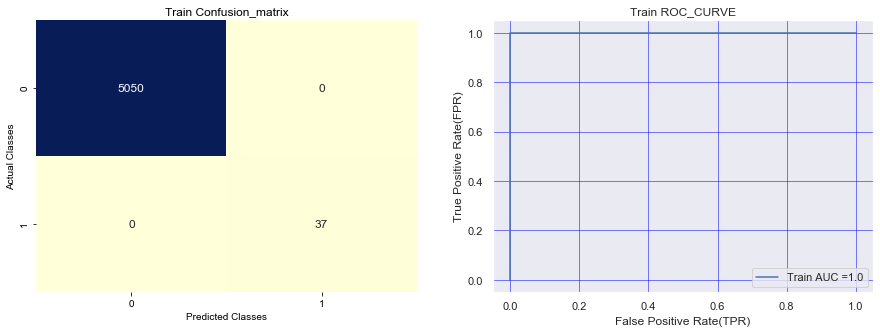

In [12]:
from sklearn.metrics import confusion_matrix ,accuracy_score 
from sklearn.metrics import f1_score , roc_curve , auc , recall_score


predicted_train_labels = best_knn.predict(scalled_train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


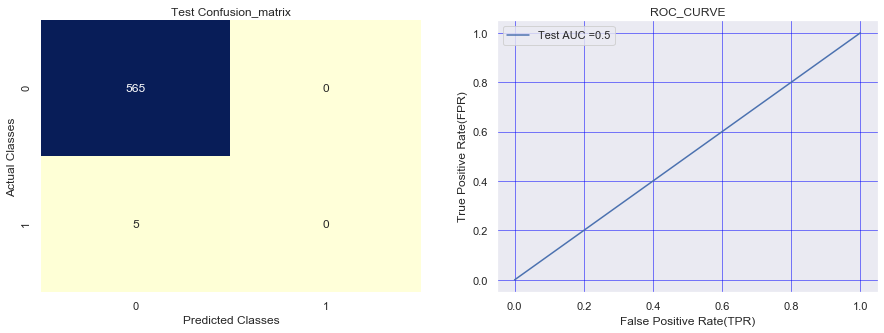

In [13]:
predicted_test_labels = best_knn.predict(scalled_test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

### Modeling With Logistic_Regression.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
hyperparameter_dict = {"penalty":["l1","l2"],"C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
                "class_weight":[None,"balanced"]}

logistic_regression = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

logistic_regression.fit(scalled_train_data,train_labels)
logistic_regression.best_estimator_

LogisticRegression(C=10)

In [9]:
logistic_regression.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [23]:
best_logistic_regression = LogisticRegression(C= 10, class_weight= None, penalty= 'l2')

best_logistic_regression.fit(scalled_train_data,train_labels)

LogisticRegression(C=10)

Train Accuracy_score is : 0.996 
 ----------------------------------------
Train f1_Score is : 0.604 
 ----------------------------------------


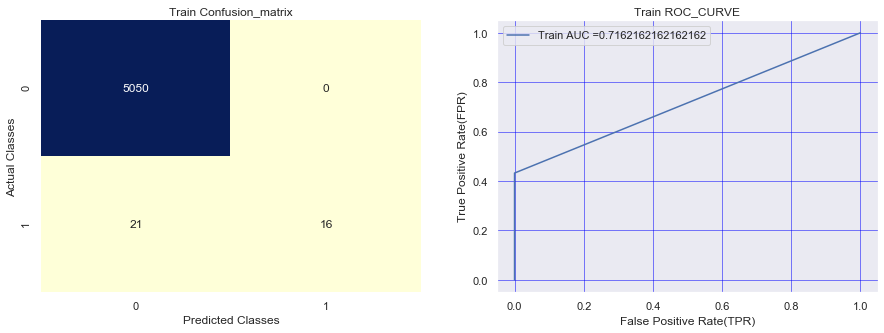

In [24]:
predicted_train_labels = best_logistic_regression.predict(scalled_train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


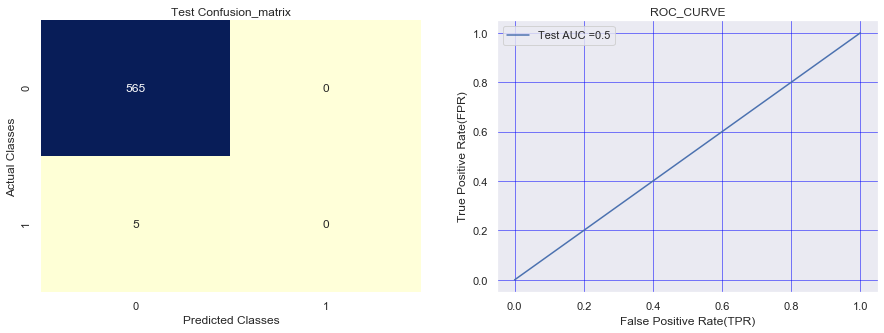

In [25]:
predicted_test_labels = best_logistic_regression.predict(scalled_test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

### Modeling With Decision_Tree 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
hyperparameter_dict = {"max_depth":[5,10,20,50,100,500]}

decison_tree = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

decison_tree.fit(scalled_train_data,train_labels)

decison_tree.best_estimator_

DecisionTreeClassifier(max_depth=100)

In [16]:
decison_tree.best_params_

{'max_depth': 100}

In [18]:
best_decision_tree = DecisionTreeClassifier(max_depth=100)
best_decision_tree.fit(scalled_train_data,train_labels)

DecisionTreeClassifier(max_depth=100)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


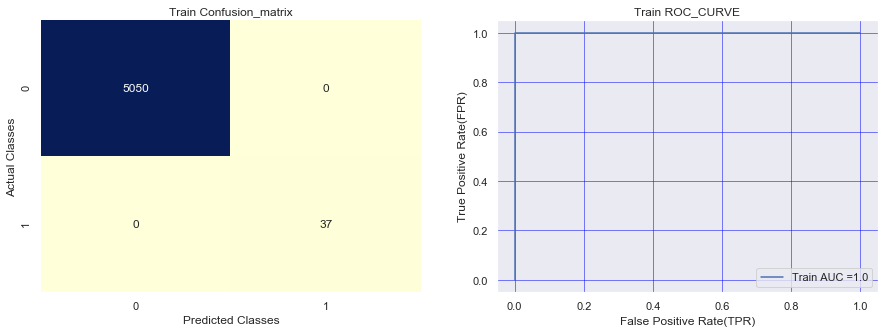

In [31]:
predicted_train_labels = best_decision_tree.predict(scalled_train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.986 
 ----------------------------------------
Test Recall_score_ is : 0.2 
 ----------------------------------------
Test_f1_Score is : 0.2 
 ----------------------------------------


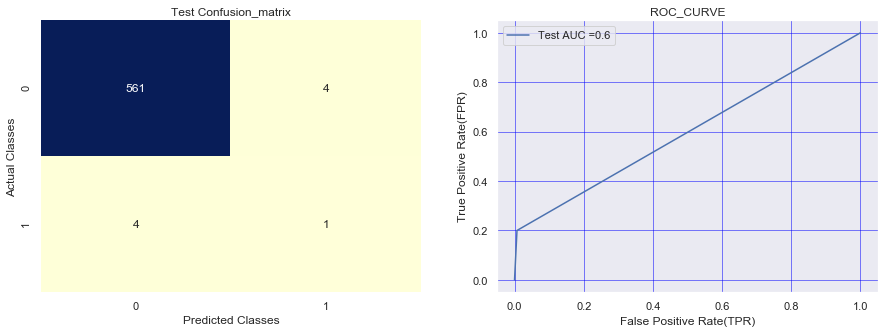

In [30]:
predicted_test_labels = best_decision_tree.predict(scalled_test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(np.round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

######  Takeaways of all Models :

* All models are performing very good on Train data. But bad on Test data. Accuracy score is good in test data also but forget about that because of the way accuracy calculates internally that could mislead us if our data is imbalanced .

* Also In Test data models are performing good on Negative class points. But bad on positive class points. It could possible because of several reasons But The main reason I am observing here is the " Imbalance nature of dataset" or in other words "lack of positive class points" .

* In front of 5050 Negative points model have only 37 positive points to learn about positive points. That's why models are learning good enough to perform well on negative points of any dataset either that is train or test. But on the other hand Because we have only 37 positive points , models are not learning enough good so they can perform good on test data positive points also.

* As we all know if train score is high and test score is low then we are leading to overfit. So are we also overfitting here.?

* Yes... We are overfitting here. Basically overfitting means overlearning. & that's right because above we saw models are overlearning negative points and not learning much about positive points.

* Remember.. When I make choice of main performance metric for this problem. There I said we need to be good in predicting positive class points. But above we saw models are good in predicting negative points and bad in predicting positive points. It Means Things are happening opposite here. We are getting opposite results from our objective.

* It's the challenge and in other words fun of Machine Learning or Ai. We may not get desired results every time. Things can go unexpectedly in wrong side. We can get totally different results.

* Let's not loose hope here. We should always try to find out solutions of the problems we have. Since we understand our problem and that is "imbalance nature of dataset" or "lack of positive points to learn". So is there a solution Of this problem.?

* Of course there is a Solution. There are several methods we can get rid of imbalance problem. Widely used methods are ..

* 1- Under sampling , 2- Oversampling

* We already have too little data(only 5087 points). Hence we can't afford under sampling here. So lets go for oversampling. That we will see in next part.

# Oversampling And Making Data Balanced

* As we see earlier Oversampling is a method through which we can get rid of imbalance dataset problem. In oversampling we create or add some extra synthetic points of minority class in dataset. So number of points of minority class could increase. And accordingly we can solve imbalance data problem. So here I will use A oversampling technique called "Synthetic Minority Oversampling Technique" or in short "SMOTE". I'll not discuss much about SMOTE here , if you want to learn about Smote then Go through the article of Analytics Vidya given bellow. Where they explains very nicely about Smote and many variations of it .

* https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [2]:
scalled_train_data = pd.read_csv("scalled_train_data.csv")
labeles_of_train_data = scalled_train_data["LABEL"]
scalled_train_data = scalled_train_data.drop("LABEL" , axis = 1)
scalled_train_data.shape,labeles_of_train_data.shape

((5087, 3198), (570, 3198))

In [4]:
negative_points_before_oversampling = labeles_of_train_data.value_counts()[0]
positive_points_before_oversampling = labeles_of_train_data.value_counts()[1]
print("negative_points_before_oversampling are :",negative_points_before_oversampling)
print("positive_points_before_oversampling are :",positive_points_before_oversampling)

negative_points_before_oversampling are : 5050
positive_points_before_oversampling are : 37


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
print("Oversampling Started..!!\n","-"*50)
start = time.time()
smenn = SMOTE(random_state = 33,n_jobs = -1,k_neighbors = 4)
train_data_oversampled , labels_oversampled = smenn.fit_resample(scalled_train_data,list(labeles_of_train_data))
end = time.time()
print("Oversampling Done in ",np.round(end-start,2),"Seconds")

Oversampling Started..!!
 --------------------------------------------------
Oversampling Done in  2.5 Seconds


In [48]:
print('Shape of train_data_oversampled is :',train_data_oversampled.shape)
train_data_oversampled.head(3)

Shape of train_data_oversampled is : (10100, 3197)


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.544171,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.555341,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.545124,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249


In [49]:
negative_points_after_oversampling = pd.Series(labels_oversampled).value_counts()[0]
positive_points_after_oversampling = pd.Series(labels_oversampled).value_counts()[1]
print("negative_points_after_oversampling are :",negative_points_after_oversampling)
print("positive_points_after_oversampling are :",positive_points_after_oversampling)
print("-"*50,"\nNow Total points in Balanced dataset are :",train_data_oversampled.shape[0])

negative_points_after_oversampling are : 5050
positive_points_after_oversampling are : 5050
-------------------------------------------------- 
Now Total points in Balanced dataset are : 10100


In [50]:
train_data_oversampled["LABEL"] = list(labels_oversampled)

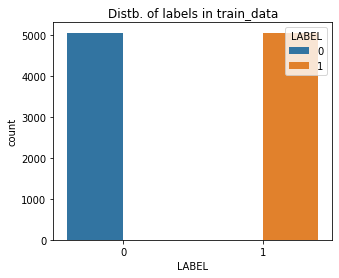

In [53]:
f = plt.figure(figsize=(5,4))
ax = sns.countplot(data = train_data_oversampled , x = "LABEL" , hue ="LABEL")
ax = plt.title("Distb. of labels in train_data")

In [56]:
train_data_oversampled.to_csv("final_train_data.csv",encoding = "utf-8",index = False)
print("""Data saved In Disk With the name "final_train_data.csv"..!!""")

Data saved In Disk With the name "final_train_data.csv"..!!


* Since now our data is balanced and We are ready for modeling on that , but first  why don't we just visualize data to see how's our data looks like. Hence I again used T-sne with different -different parameters and reduced dimensionality of data to 2 dimensions just to plot and visualize.

### Visualizing Balanced Data With Help of T-sne

In [5]:
final_train_data = pd.read_csv("final_train_data.csv")
train_labels = final_train_data["LABEL"]
final_train_data = final_train_data.drop("LABEL" , axis = 1)
print("Shape of final_train_data is :",final_train_data.shape)

Shape of final_train_data is : (10100, 3197)


In [6]:
from sklearn.manifold import TSNE

#### With Perplexity = 50

Shape of train_dataset after reducing dimensionality is : (10100, 2)
--------------------------------------------------------------------------------


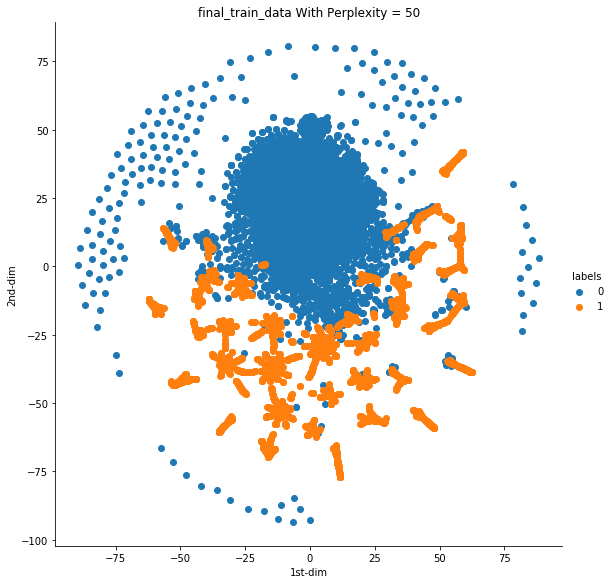

In [8]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 50,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(final_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
print("-"*80)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(train_labels)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("final_train_data With Perplexity = 50")
plt.show()

#### With Perplexity = 100 

Shape of train_dataset after reducing dimensionality is : (10100, 2)


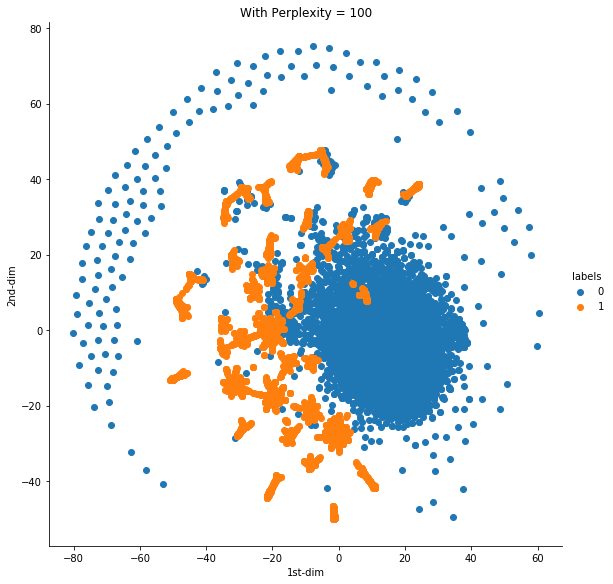

In [9]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 100,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(final_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(train_labels)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Perplexity = 100")
plt.show()

#### With Perplexity = 100 & Num._of iterations = 3000 

Shape of train_dataset after reducing dimensionality is : (10100, 2)


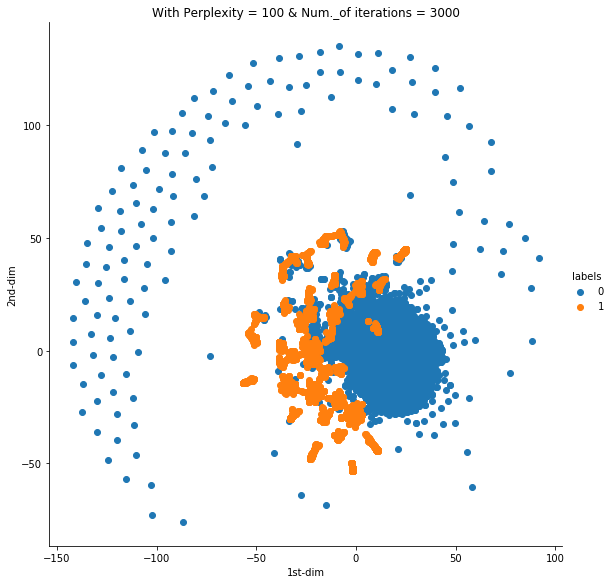

In [10]:
model = TSNE(n_components = 2 , random_state = 0 , perplexity = 100 , n_iter= 3000,n_jobs = -1)
dataset_with_2_dimensions = model.fit_transform(final_train_data)
print("Shape of train_dataset after reducing dimensionality is :",dataset_with_2_dimensions.shape)
dataset_with_2_dimensions = pd.DataFrame(data = dataset_with_2_dimensions , columns = ("1st-dim" , '2nd-dim'))
labels = list(train_labels)
dataset_with_2_dimensions['labels'] = labels
sns.FacetGrid(dataset_with_2_dimensions , hue = "labels" , size = 8 )\
   .map(plt.scatter , '1st-dim' , "2nd-dim")\
   .add_legend()
plt.title("With Perplexity = 100 & Num._of iterations = 3000")
plt.show()

###### Takeaway :

* Here after oversampling we can also clearly see dominance of positive points in plots. Now we have good number of data points from both classes. Maybe now we can get better results in modeling. Lets go to next part and see what we get.

#  Modeling with Balanced_data

### Loading Data & Preparing for Modeling

In [12]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix ,accuracy_score , f1_score , roc_curve ,auc ,recall_score

In [5]:
start = time.time()
train_data = pd.read_csv(r"final_train_data.csv")
end = time.time()
print("Train_data Loaded..!!\n","-"*50,"\nTime taken to load data is :",np.round(end - start,2),"Seconds\n",
       "-"*50,"\nShape of Train_data is:",train_data.shape,"\n","-"*50)
train_data.head(3)

Train_data Loaded..!!
 -------------------------------------------------- 
Time taken to load data is : 18.06 Seconds
 -------------------------------------------------- 
Shape of Train_data is: (10100, 3198) 
 --------------------------------------------------


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
0,0.554745,0.602764,0.524654,0.511858,0.487822,0.439388,0.469687,0.465073,0.526355,0.507944,...,0.581155,0.485918,0.557922,0.596574,0.615022,0.590597,0.610348,0.564506,0.567276,1
1,0.535415,0.584061,0.513189,0.509895,0.481856,0.446937,0.477446,0.466708,0.525717,0.522151,...,0.591895,0.496235,0.551292,0.589162,0.603125,0.581820,0.601009,0.566321,0.576673,1
2,0.618647,0.674644,0.596622,0.590299,0.562266,0.525303,0.565363,0.552128,0.607175,0.613460,...,0.598884,0.502949,0.550629,0.586939,0.603683,0.581803,0.594999,0.552025,0.558249,1


In [6]:
start = time.time()
test_data = pd.read_csv(r"scalled_test_data.csv")
end = time.time()
print("test_data Loaded..!!\n","-"*50,"\nTime taken to load data is :",np.round(end - start,2),"Seconds\n",
       "-"*50,"\nShape of test_data is:",test_data.shape,"\n","-"*50)
test_data.head(3)

test_data Loaded..!!
 -------------------------------------------------- 
Time taken to load data is : 1.58 Seconds
 -------------------------------------------------- 
Shape of test_data is: (570, 3198) 
 --------------------------------------------------


,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
0,0.558536,0.605372,0.534329,0.523186,0.500681,0.463255,0.494217,0.480500,0.539895,0.530567,...,0.599802,0.503116,0.554376,0.591685,0.608925,0.589326,0.605991,0.608440,0.582645,1
1,0.540974,0.589298,0.521615,0.515838,0.493668,0.457377,0.491116,0.479358,0.538770,0.534007,...,0.445735,0.319416,0.342450,0.336723,0.335850,0.193993,0.197838,0.182267,0.252009,1
2,0.664061,0.719409,0.633995,0.616964,0.584640,0.530168,0.561577,0.533685,0.571294,0.558795,...,0.588908,0.493863,0.546639,0.578446,0.580402,0.567449,0.572268,0.557548,0.578364,1


In [7]:
train_labels = train_data["LABEL"]
test_labels = test_data["LABEL"]
train_data = train_data.drop("LABEL" , axis = 1)
test_data = test_data.drop("LABEL" , axis = 1)
print("Shape of train_data and his labels is:",train_data.shape,"&",train_labels.shape,"\n","-"*50)
print("Shape of test_data and his labels is:",test_data.shape,"&",test_labels.shape)

Shape of train_data and his labels is: (10100, 3197) & (10100,) 
 --------------------------------------------------
Shape of test_data and his labels is: (570, 3197) & (570,)


### Modeling With KNN 

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

hyperparameter_dict = dict(n_neighbors = list(range(1,100,10)))

knn = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)
knn.fit(train_data,train_labels)
knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [61]:
knn.best_params_

{'n_neighbors': 1}

In [63]:
best_knn = KNeighborsClassifier(n_neighbors=1)
best_knn.fit(train_data,train_labels)

KNeighborsClassifier(n_neighbors=1)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


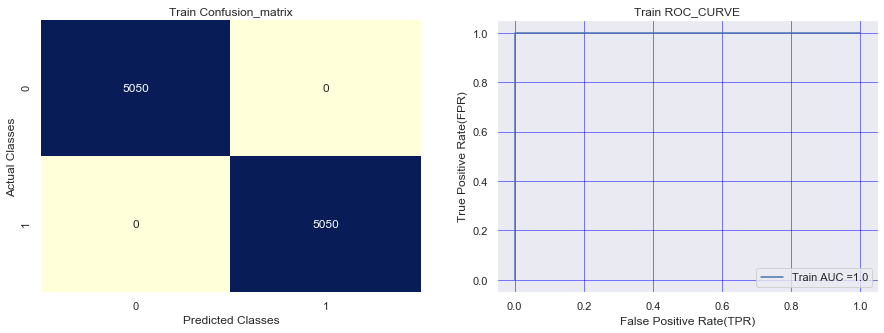

In [64]:
predicted_train_labels = best_knn.predict(train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.993 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.5 
 ----------------------------------------


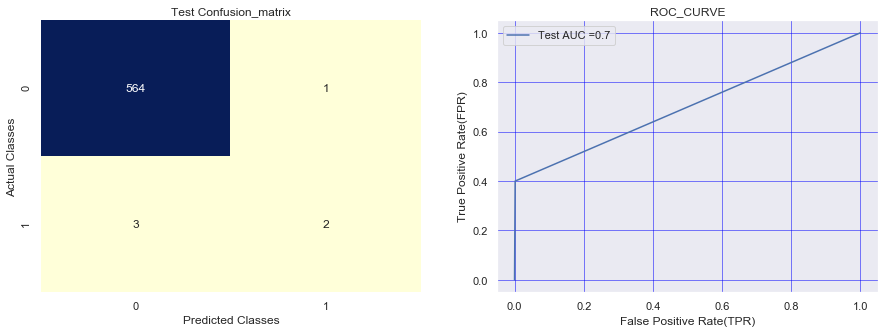

In [65]:
predicted_test_labels = best_knn.predict(test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(np.round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

### Modeling With Logistic_regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
hyperparameter_dict = {"penalty":["l1","l2"],"C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
                "class_weight":[None,"balanced"]}

logistic_regression = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

logistic_regression.fit(train_data,train_labels)
logistic_regression.best_estimator_

LogisticRegression(C=100)


In [37]:
print(logistic_regression.best_params_)

{'C': 100, 'class_weight': None, 'penalty': 'l2'}


In [23]:
best_logistic_regression = LogisticRegression(C= 100, class_weight= None, penalty= 'l2')

best_logistic_regression.fit(train_data,train_labels)

LogisticRegression(C=100)

Train Accuracy_score is : 0.982 
 ----------------------------------------
Train Recall_score_ is : 0.989 
 ----------------------------------------
Train f1_Score is : 0.982 
 ----------------------------------------


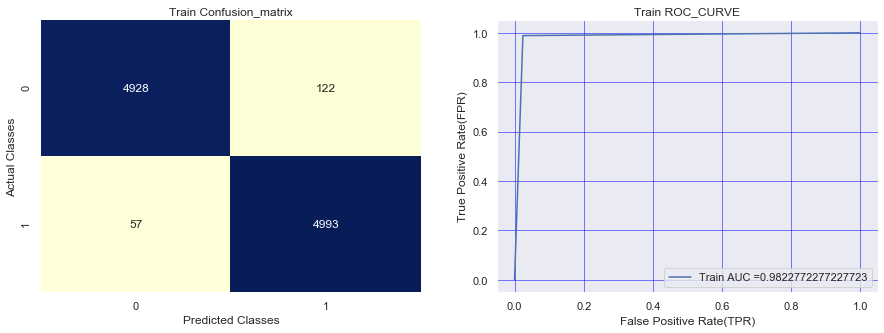

In [24]:
predicted_train_labels = best_logistic_regression.predict(train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.986 
 ----------------------------------------
Test Recall_score_ is : 0.8 
 ----------------------------------------
Test_f1_Score is : 0.5 
 ----------------------------------------


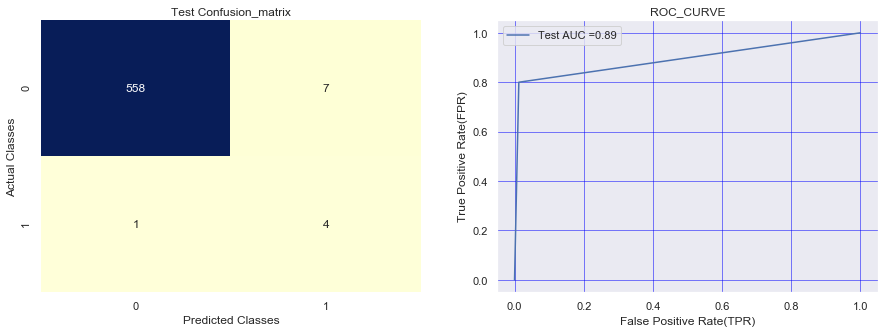

In [28]:
predicted_test_labels = best_logistic_regression.predict(test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(np.round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

### Modeling With Linear-SVM 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

classifier = LinearSVC()
hyperparameter_dict = {"penalty":["l1","l2"],"C":[0.0001,0.001,0.01,0.1,1,10,100,1000]}

svm = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

svm.fit(train_data,train_labels)
svm.best_params_

{ penaltiy : 'l2', "C" :1}


In [10]:
best_svm = LinearSVC(penalty = "l2", C = 1)
best_svm.fit(train_data,train_labels)

LinearSVC(C=1)

Train Accuracy_score is : 0.999 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 0.999 
 ----------------------------------------


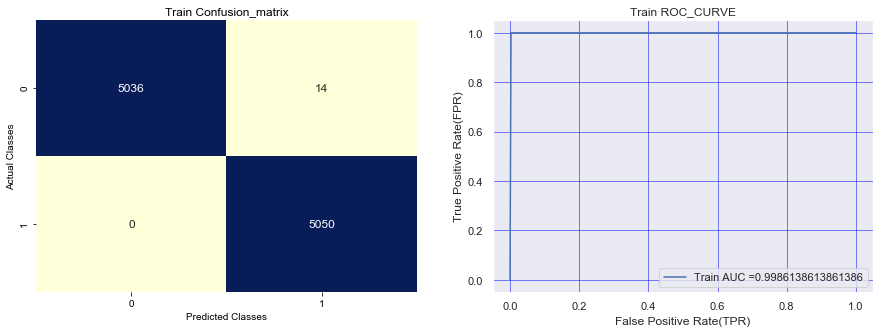

In [13]:
predicted_train_labels = best_svm.predict(train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.977 
 ----------------------------------------
Test Recall_score_ is : 0.2 
 ----------------------------------------
Test_f1_Score is : 0.133 
 ----------------------------------------


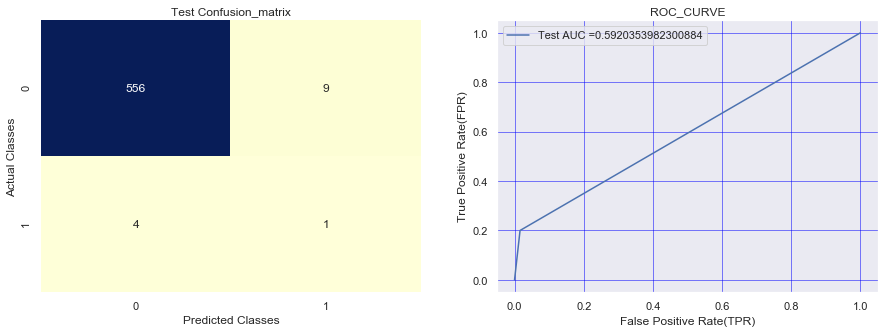

In [14]:
predicted_test_labels = best_svm.predict(test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

### Modeling With Decision_tree 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
hyperparameter_dict = {"max_depth":[5,10,20,50,100,500]}

decison_tree = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

decison_tree.fit(train_data,train_labels)

decison_tree.best_estimator_

DecisionTreeClassifier(max_depth=50)

In [12]:
decison_tree.best_params_

{'max_depth': 50}

In [13]:
best_decision_tree = DecisionTreeClassifier(max_depth=50)
best_decision_tree.fit(train_data,train_labels)

DecisionTreeClassifier(max_depth=50)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


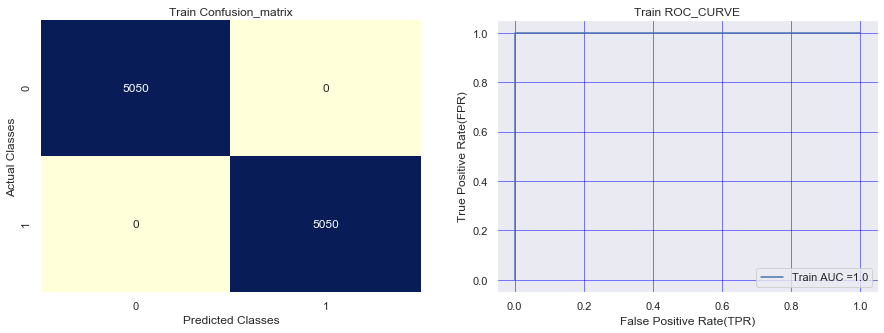

In [14]:
predicted_train_labels = best_decision_tree.predict(train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.989 
 ----------------------------------------
Test Recall_score_ is : 0.4 
 ----------------------------------------
Test_f1_Score is : 0.4 
 ----------------------------------------


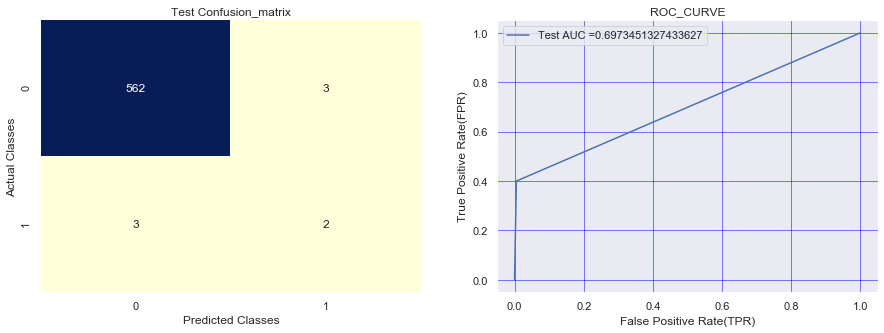

In [20]:
predicted_test_labels = best_decision_tree.predict(test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

###  Modeling With Random_Forest

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
hyperparameter_dict = {'n_estimators': [50,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

random_forest = GridSearchCV(estimator = classifier,param_grid = hyperparameter_dict,
                                         scoring = "f1",n_jobs = -1,cv = 5)

random_forest.fit(train_data,train_labels)

random_forest.best_estimator_

RandomForestClassifier(n_estimators=50)

In [9]:
random_forest.best_params_

{'n_estimators': 50}

In [15]:
from sklearn.ensemble import RandomForestClassifier
best_random_forest = RandomForestClassifier(n_estimators=50,n_jobs = -1)
best_random_forest.fit(train_data,train_labels)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

Train Accuracy_score is : 1.0 
 ----------------------------------------
Train Recall_score_ is : 1.0 
 ----------------------------------------
Train f1_Score is : 1.0 
 ----------------------------------------


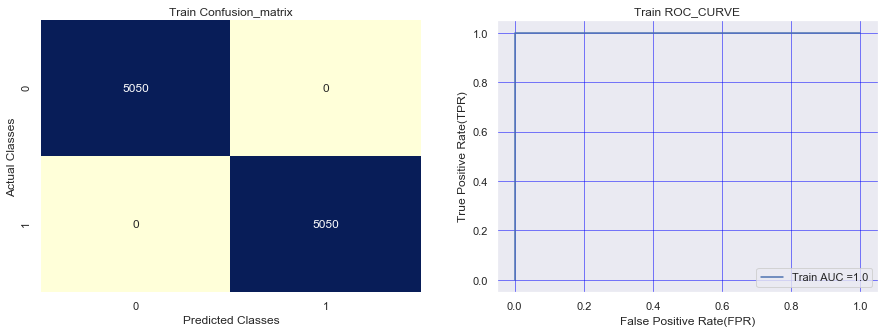

In [17]:
predicted_train_labels = best_random_forest.predict(train_data)
accuracy_score_ = accuracy_score(train_labels,predicted_train_labels)
print("Train Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(train_labels,predicted_train_labels)
print("Train Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(train_labels,predicted_train_labels)
print("Train f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))

plt.subplot(121)
conf_mat = confusion_matrix(train_labels,predicted_train_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Train Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)
train_fpr , train_tpr , thresolds = roc_curve(train_labels,predicted_train_labels)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Train ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

Test_Accuracy_score is : 0.991 
 ----------------------------------------
Test Recall_score_ is : 0.0 
 ----------------------------------------
Test_f1_Score is : 0.0 
 ----------------------------------------


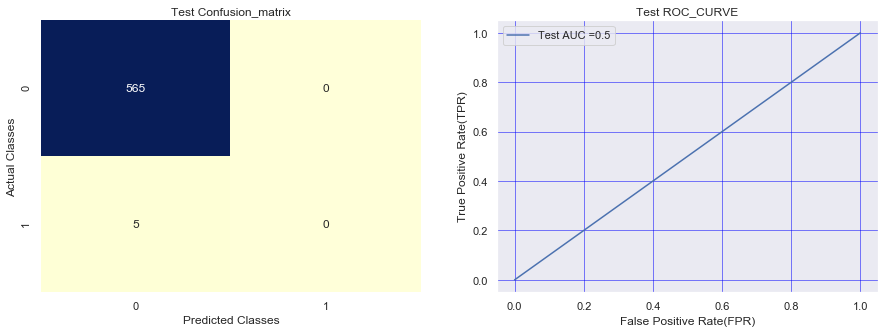

In [18]:
predicted_test_labels = best_random_forest.predict(test_data)
accuracy_score_ = accuracy_score(test_labels,predicted_test_labels)
print("Test_Accuracy_score is :",np.round(accuracy_score_,3),"\n","-"*40)
recall_score_ = recall_score(test_labels,predicted_test_labels)
print("Test Recall_score_ is :",np.round(recall_score_,3),"\n","-"*40)
f1_score_ = f1_score(test_labels,predicted_test_labels)
print("Test_f1_Score is :",np.round(f1_score_,3),"\n","-"*40)

plt.figure(figsize=(15,5))
plt.subplot(121)

conf_mat = confusion_matrix(test_labels,predicted_test_labels)
sns.set()
ax = sns.heatmap(conf_mat,annot = True,cmap="YlGnBu",fmt="d",cbar=False)
ax = plt.title("Test Confusion_matrix")
ax = plt.xlabel("Predicted Classes")
ax = plt.ylabel("Actual Classes")

plt.subplot(122)

test_fpr , test_tpr , thresolds = roc_curve(test_labels,predicted_test_labels)
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Test ROC_CURVE")
plt.grid(color='blue', linestyle='-', linewidth=0.5)

######  Comparing All trained Models and Choosing best for Future.

* All Models are performing Very good on Train Data. They are also performing better on test data if we compare new modes which are trained on balanced data with model which we trained earlier on imbalanced data.

* As we can clearly see in above part Model performances on positive points of test data is also slightly improved except Random forest Which is not predicting any positive point  correctly of test data.

* Previously when we trained KNN on imbalanced data Then That was predicting 0 positive points correctly of Test Data . But now If We see then KNN is now predicting 2 positive points correctly out of 5 positive points of test data. That's why Recall is 40%. & It's better than previous KNN Recall which was 0%.

* Previously when we trained Decision-Tree Imbalanced data set then the recall was just 20%. But now it gets improved till 40%.

* Our best Model here is Logistic Regression. When we trained log-regression earlier then It's recall on test data was literally 0%. It Means That was not predicting any positive point of test data correctly. But now Recall on test data is improved from 0% to 80%. It's SUPER good. Now log-regression is predicting 4 out of 5 positive points correctly of test data. Apart from F1-score (50%) all other metrices also looks good . Accuracy on test Data is 98% , AUC on test data is 89%. The only bad point about our log-Regression model is Sadly It is predicting 7 Negative points as positive points. But That's okay. Because remember our goal here is to maximize number of correctly classified positive points. And we are archiving that.

* In real World Datasets It happens if we didn't get Perfect results. And That's perfectly Okay . Specially when we have a totally different dataset of Space Then it becomes really really hard to archive very best results. Always Remember nothing is perfect in this World. No Technology can give you guaranty of always archiving 100% desired results. Everything comes with that's own drawbacks , So machine learning also has. Hence it's also possible that machine learning or AI could not deliver 100% robust results.

* Our goal Here was to do maximum correct prediction of existence of exoplanet if there is a exoplanet in orbit of star. In other words to do maximum correct prediction of right points. And we Archived that. Out of 5 times 4 times Our logistic-Regression model is prediction correctly if there is a Exoplanet. So Lets Go further and look at the code of Log-Regression Training for a clear Picture .

# Saving best Model In Disk. 

* At the time of Training any model , That model remains in the Ram memory itself. So we can make any number of predictions that time. But the next question comes in mind is once we Trained a model then how can we use it later maybe after some days , or maybe after some moths or anytime in Future. ? { As a beginner in Ai This question was really hard for me . ;) }

* For that Obviously we need to save our model in our Rom memory or somewhere else Where that could store for as long as we want. And Its as simple as writing one line of code. We can save our trained model with help of python in just 1 line of code. and Can again load model in ram or in any variable anytime when we need in just one line of code. It's as simple as that.

* There are hundreds of ways through which you can do that. Ill show you one of the way here. I'll save our model as a pickle file with help of JOBLIB.

In [30]:
import joblib
print("Saving Best_performance_model in Disk..!!\n","-"*50)
# Saving the model as a pickle in a file 
joblib.dump(best_logistic_regression, 'Best_performance_model.pkl') 
print("Best_performance_model saved in Disk..!!\n")

Saving Best_performance_model in Disk..!!
 --------------------------------------------------
Best_performance_model saved in Disk..!!



# Creating Whole Data Science Pipeline in one function To predict a given raw point. 

* Creating Whole Pipeline in just one function for predicting raw input is the last important step in whole Data Science or Machine Learning Life Cycle. This last one Predict Function is the whole crucks of Everything that we have done yet. Because in future or in production of model we will not go through again each and every step that we have done yet. This predict function should contains everything that need to make a prediction of raw input.

* We have to include each any every preprocessing and transformation exactly same that we have done on the data before giving to model. Bellow are the steps that ill perform in my predict function in order to predict raw point.

* Initially we need to see if the input we get in predict function is right or not. If input is right then we will perform prediction otherwise not.

* First Change I have done earlier with my data was replacing outlier value with median of that feature. So in my predict function firstly ill replace outliers with mean of that feature. Remember we saved outlier_history_dict in disk earlier when we were removing outlier from train data. Here that dictionary comes in use. Now imagine if we didn't save that dictionary and didn't have anything. Then now how can we make decisions about which value is outlier and which is not. & And how can we get to know what is the median value for which feature to replacing outlier.

* Second change I have done with my data was  Scaling. There I saved scalling_history_dict in disk. So ill take help of that disk. and will scale each feature or value.

* That's all about transformations and changes in data , that I have done before giving data to model for training. Hence after performing above two steps ill load my best performing model and will make prediction.

* If the prediction is 0 then simply ill return " There is not any exoplanet in orbit of that star." , and if the prediction is 1 the ill simply return "Yes there is at least on exoplanet in orbit of that star."

* I change my function named from "prediction" to "Is_There_a_Exoplanet_in_orbit_of_that_star" Just to connect final function with problem statement.

In [153]:
import numpy as np
import joblib

def Is_There_a_Exoplanet_in_orbit_of_that_star(raw_point):
    if len(raw_point) == 3197:
        # Outlier_detection and removing
        outlier_removed_point = []
        outlier_dict_path = r"C:\Users\AC\Downloads\Exoplanet_hunting\outlier_history_dict.npy"
        outlier_history_dict = np.load(outlier_dict_path,allow_pickle='TRUE').item()
        for index in range(1,len(raw_point)+1):
            new_value = raw_point[index-1]
            if raw_point[index-1] < outlier_history_dict["FLUX."+str(index)]['percentile_1th']:
                new_value = outlier_history_dict["FLUX."+str(index)]['median']
            if raw_point[index-1] > outlier_history_dict["FLUX."+str(index)]['percentile_99th']:
                new_value = outlier_history_dict["FLUX."+str(index)]['median']
            outlier_removed_point.append(new_value)
        
        # Scalling point
        scalled_point = []
        scalling_history_dict_path = r"C:\Users\AC\Downloads\Exoplanet_hunting\scalling_history_dict.npy"
        scalling_history_dict = np.load(scalling_history_dict_path,allow_pickle='TRUE').item()
        for index in range(1,len(raw_point)+1):
            feature_value = raw_point[index-1]
            min_feature = scalling_history_dict["FLUX."+str(index)]['min_feature']
            max_feature = scalling_history_dict["FLUX."+str(index)]['max_feature']
            scalled_value = ((feature_value - min_feature) / (max_feature - min_feature))
            scalled_point.append(scalled_value)
        
        # Loading Model for Prediction
        model_path = r"C:\Users\AC\Downloads\Exoplanet_hunting\Best_performance_model.pkl"
        model = joblib.load(model_path)
        
    
        # predicting point
    
        prediction = model.predict(np.array(scalled_point).reshape(1, -1))
    
        if prediction == 0:
            result = str("""This is a Negative Point. \n It means there is not any planet in orbit of that Star.""")
        else :
            result = str("""YES.. This is a Positive Point. \n It means there is atleast one planet in orbit of that Star.""") 
        return result
    else:
        Print("Please Give Right Raw Input to Predict..")

In [144]:
raw_test_data = pd.read_csv(r"C:\Users\AC\Downloads\Exoplanet_hunting\Data\exoTest.csv")
raw_test_data = new_test_data.drop("LABEL",axis = 1)
raw_test_data.shape

(570, 3197)

In [154]:
import time
point  = raw_test_data.iloc[1]
start = time.time()
result = Is_There_a_Exoplanet_in_orbit_of_that_star(point)
end = time.time()
print("Prediction Done in",start-end,"seconds\n","-"*50,"\n",result)

Prediction Done in -0.1755232810974121 seconds
 -------------------------------------------------- 
 This is a Negative Point. 
 It means there is not any planet in orbit of that Star.


In [155]:
import time
point  = raw_test_data.iloc[2]
start = time.time()
result = Is_There_a_Exoplanet_in_orbit_of_that_star(point)
end = time.time()
print("Prediction Done in",start-end,"seconds\n","-"*50,"\n",result)

Prediction Done in -0.19168519973754883 seconds
 -------------------------------------------------- 
 YES.. This is a Positive Point. 
 It means there is atleast one planet in orbit of that Star.


# Good Bye Folks.. Best Of Luck For Future..!!  :) :)